### navigate the python interpretter to the project directory OcTyPy

### import required functions from octypy and read the configuration file

In [1]:
import os
import sys
import glob
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

## because this notebook is in the /notebooks/examples directory
## before importing the local code in the octypy package it is necessary
## to drop down two directory levels to the top level project directory
## for the interpretter to be able to import that code and the config file
os.chdir('../../')
project_folder = os.getcwd()
print(f'top level project folder: "{project_folder}"')

from octypy import *
Config = Octypy_Config()

top level project folder: "/Users/cb6f08/Documents/GitHub/OcTyPy"
True
*******
warning   ⚠  no "data partition" in PATHS adding default
*******


### import the correct version of  the coast package

In [2]:
coast_folder = os.path.abspath(Config.PATHS['coast folder'])

try:
    os.chdir(coast_folder)
    import coast
    os.chdir(project_folder)
except:
    printError(f'check "{CONFIG_FILE}" for valid "coast folder" option in "PATHS"')
    
printProgress(f'sucessfully imported coast from "{coast_folder}"')

>>>  sucessfully imported coast from "/Users/cb6f08/Documents/GitHub/OcTyPy"


### list all netcdf files in the data partition

In [3]:
data_partition = Config.PATHS['data partition']

if os.path.isdir(data_partition):
    printProgress(f'data partition is: "{data_partition}"')
    printProgress()
else:
    printError(f'check "{CONFIG_FILE}" for valid "data partition" option in "PATHS"')
    
netCDF_filepaths = glob.glob(pathname=data_partition+'/**/*.nc',
                             recursive=True)

if netCDF_filepaths:
    [printProgress(file_path) for file_path in netCDF_filepaths]
else:
    printError('did not find any netCDF files')

>>>  data partition is: "data"
>>>  
>>>  data/trial/SENEMO_1m_20140101_20141231_grid_T_201401-201401.nc
>>>  data/trial/SENEMO_1m_20150101_20151231_grid_T_201507-201507.nc
>>>  data/trial/SENEMO_1m_20140101_20141231_grid_T_201408-201408.nc
>>>  data/trial/SENEMO_1m_20150101_20151231_grid_T_201510-201510.nc
>>>  data/trial/SENEMO_1m_20140101_20141231_grid_T_201402-201402.nc
>>>  data/trial/SENEMO_1m_20150101_20151231_grid_T_201504-201504.nc
>>>  data/trial/SENEMO_1m_20150101_20151231_grid_T_201505-201505.nc
>>>  data/trial/SENEMO_1m_20150101_20151231_grid_T_201511-201511.nc
>>>  data/trial/SENEMO_1m_20140101_20141231_grid_T_201403-201403.nc
>>>  data/trial/SENEMO_1m_20150101_20151231_grid_T_201506-201506.nc
>>>  data/trial/SENEMO_1m_20140101_20141231_grid_T_201409-201409.nc
>>>  data/trial/SENEMO_1m_20150101_20151231_grid_T_201512-201512.nc
>>>  data/trial/SENEMO_1m_20140101_20141231_grid_T_201412-201412.nc
>>>  data/trial/SENEMO_1m_20150101_20151231_grid_T_201509-201509.nc
>>>  data/t

### select a particular file and open it using xarray

In [4]:
my_xarray_ds = xr.open_dataset(netCDF_filepaths[10])
my_xarray_ds

<xarray.Dataset>
Dimensions:                (y: 51, x: 51, time_counter: 1, nvertex: 4,
                            deptht: 75, axis_nbounds: 2)
Coordinates:
  * deptht                 (deptht) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    nav_lat                (y, x) float32 ...
    nav_lon                (y, x) float32 ...
    time_centered          (time_counter) datetime64[ns] ...
  * time_counter           (time_counter) datetime64[ns] 2014-09-16
Dimensions without coordinates: y, x, nvertex, axis_nbounds
Data variables: (12/35)
    area                   (y, x) float32 ...
    berg_latent_heat_flux  (time_counter, y, x) float32 ...
    botpres                (time_counter, y, x) float64 ...
    bounds_nav_lat         (y, x, nvertex) float32 ...
    bounds_nav_lon         (y, x, nvertex) float32 ...
    deptht_bounds          (deptht, axis_nbounds) float32 ...
    ...                     ...
    thkcello               (time_counter, deptht, y, x) float32 ...
    time_centered_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds    (time_counter, axis_nbounds) datetime64[ns] ...
    tos_con                (time_counter, y, x) float32 ...
    zos                    (time_counter, y, x) float32 ...
    zossq                  (time_counter, y, x) float32 ...
Attributes:
    name:         SENEMO_1m_20140101_20141231_grid_T
    description:  Created by xios
    title:        Created by xios
    Conventions:  CF-1.6
    timeStamp:    2022-Mar-09 00:25:17 GMT
    uuid:         5646ba3f-812c-4341-ad1c-2880cd0b378e
    history:      Wed Aug 17 17:58:36 2022: ncks -F -d x,1100,1150 -d y,880,9...
    NCO:          netCDF Operators version 4.7.5 (Homepage = http://nco.sf.ne...

### generate a plot of selected data

/Users/cb6f08/opt/anaconda3/envs/octypy/lib/python3.10/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


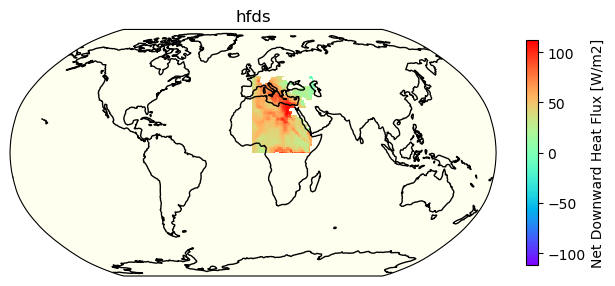

In [5]:
ortho = ccrs.Orthographic(-10, 20)
mollw = ccrs.Mollweide(0)
rob = ccrs.Robinson(0)
funky = ccrs.InterruptedGoodeHomolosine()

ds = my_xarray_ds.data_vars['hfds'].isel(time_counter=0)

p = ds.plot(
            subplot_kws=dict(projection=rob, facecolor="ivory"),
            cbar_kwargs={'shrink': 0.5},
            transform=ccrs.PlateCarree(),
            cmap=plt.cm.rainbow,
           )
p.axes.set_global()
p.axes.coastlines()
p.axes.set_title('hfds')
plt.tight_layout()

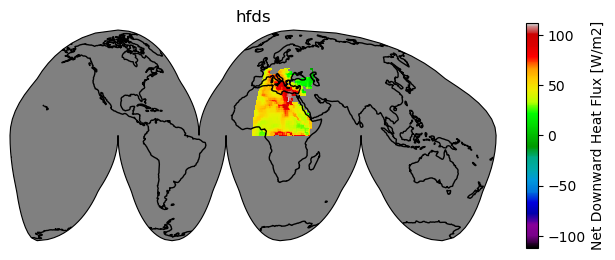

In [6]:
p = ds.plot(
            subplot_kws=dict(projection=funky, facecolor="grey"),
            cbar_kwargs={'shrink': 0.5},
            transform=ccrs.PlateCarree(),
            cmap=plt.cm.nipy_spectral,
           )
p.axes.set_global()
p.axes.coastlines()
p.axes.set_title('hfds')
plt.tight_layout()

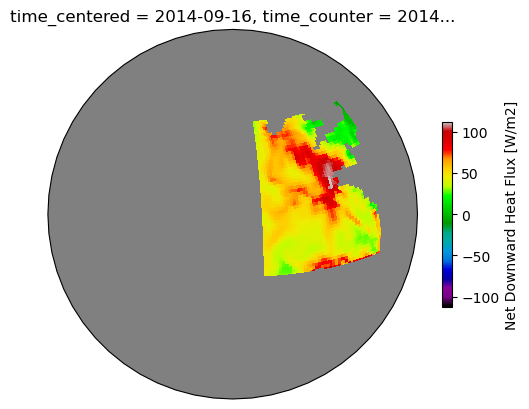

In [7]:
## an alternative is to use plot.imshow but this might be less configurable

my_xarray_ds.data_vars['hfds'].isel(time_counter=0).plot.imshow(
    subplot_kws=dict(projection=ortho, facecolor="grey"),
    cbar_kwargs={'shrink': 0.5},
    transform=ccrs.PlateCarree(),
    cmap=plt.cm.nipy_spectral,
)